# Building Energy Rating Analysis and Prediction

## Setup

libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
#Check path of working directory
%pwd
#change wd to file location
%cd "d:/Colleges/DCU/A.I/Data Analysis/"

d:\Colleges\DCU\A.I\Data Analysis


Data downloaded from Sustainable Energy Authority Ireland
https://ndber.seai.ie/BERResearchTool/ber/search.aspx

Data was rewritten from a .txt file into a .csv file to read into python.

In [2]:

df = pd.read_csv('project/BER/ber.csv', low_memory = False)
#46seconds

Check file loaded correctly

In [3]:
df.shape
df.groupby(['EnergyRating']).count()


,Unnamed: 0,index,CountyName,DwellingTypeDescr,Year_of_Construction,TypeofRating,BerRating,GroundFloorArea(sq m),UValueWall,UValueRoof,...,ThirdWallAgeBandId,ThirdWallTypeId,SA_Code,prob_smarea_error_0corr,prob_smarea_error_100corr,RER,RenewEPnren,RenewEPren,CPC,EPC
EnergyRating,,,,,,,,,,,,,,,,,,,,,
A1,967,967,967,967,967,967,967,967,967,967,...,122,123,296,296,296,640,640,640,933,933
A2,44977,44977,44977,44977,44977,44977,44977,44977,44977,44977,...,4445,4452,7615,7615,7615,23336,23336,23336,44723,44723
A3,57818,57818,57818,57818,57818,57818,57818,57818,57818,57818,...,6668,6828,22906,22906,22906,9926,9926,9926,55709,55709
B1,15435,15435,15435,15435,15435,15435,15435,15435,15435,15435,...,2294,2880,11435,11435,11435,3480,3480,3480,9285,9285
B2,33561,33561,33561,33561,33561,33561,33561,33561,33561,33561,...,5154,6212,26690,26690,26690,6863,6863,6863,11390,11390
B3,77900,77900,77900,77900,77900,77900,77900,77900,77900,77900,...,12260,13526,64926,64926,64926,12876,12876,12876,18575,18575
C1,113822,113822,113822,113822,113822,113822,113822,113822,113822,113822,...,17384,18016,96801,96801,96801,14664,14664,14664,20467,20467
C2,123993,123993,123993,123993,123993,123993,123993,123993,123993,123993,...,19348,19570,105174,105174,105174,13896,13896,13896,18950,18950
C3,117541,117541,117541,117541,117541,117541,117541,117541,117541,117541,...,19829,19929,97604,97604,97604,12176,12176,12176,16514,16514


In [4]:
df.head()

,Unnamed: 0,index,CountyName,DwellingTypeDescr,Year_of_Construction,TypeofRating,EnergyRating,BerRating,GroundFloorArea(sq m),UValueWall,...,ThirdWallAgeBandId,ThirdWallTypeId,SA_Code,prob_smarea_error_0corr,prob_smarea_error_100corr,RER,RenewEPnren,RenewEPren,CPC,EPC
0,1,1,Co. Kerry,Detached house,1996,Existing,C3,202.72,262.98,0.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,Co. Donegal,Semi-detached house,2004,Existing,C2,184.06,118.14,0.55,...,NaN,NaN,57106026,0.000222,0.012347,NaN,NaN,NaN,NaN,NaN
2,3,3,Co. Kildare,End of terrace house,1970,Existing,D2,273.58,78.04,0.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,Dublin 8,Mid-floor apartment,2000,Existing,E2,361.76,46.92,0.72,...,9.0,11.0,268085004,0.000320,0.012347,NaN,NaN,NaN,NaN,NaN
4,5,5,Co. Roscommon,Detached house,1981,Existing,B3,139.61,182.66,0.43,...,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Summary Statistics

In [5]:
df.describe()


,Unnamed: 0,index,Year_of_Construction,BerRating,GroundFloorArea(sq m),UValueWall,UValueRoof,UValueFloor,UValueWindow,UvalueDoor,...,ThirdWallUValue,ThirdWallAgeBandId,ThirdWallTypeId,prob_smarea_error_0corr,prob_smarea_error_100corr,RER,RenewEPnren,RenewEPren,CPC,EPC
count,1.011555e+06,1.011555e+06,1.011555e+06,1.011555e+06,1.011555e+06,1.011555e+06,1.011555e+06,1.011555e+06,1.011555e+06,1.011555e+06,...,180877.000000,176360.000000,180516.000000,7.674620e+05,767462.000000,137865.000000,137865.000000,137865.000000,250431.000000,250431.000000
mean,5.057780e+05,5.057780e+05,1.983602e+03,2.369574e+02,1.134012e+02,6.690783e-01,3.755117e-01,4.317214e-01,2.611958e+00,2.399085e+00,...,0.781850,6.440888,6.358112,1.863817e-02,0.021077,0.122511,20558.034605,1648.581893,1.032138,0.961093
std,2.920109e+05,2.920109e+05,3.365266e+01,1.776136e+02,5.930509e+01,5.633919e-01,5.013500e-01,2.513896e-01,8.565985e-01,1.022362e+00,...,0.632851,3.048832,3.010487,4.481518e-02,0.028883,0.196335,16989.325684,3457.050510,0.969813,0.755433
min,1.000000e+00,1.000000e+00,1.753000e+03,-1.584200e+02,5.470000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.010000,0.000000,1.000000,5.642000e-09,0.002500,0.000000,0.000000,-38584.300000,-3.025000,-0.347000
25%,2.528895e+05,2.528895e+05,1.973000e+03,1.563000e+02,7.765000e+01,3.000000e-01,1.300000e-01,2.900000e-01,2.200000e+00,1.710000e+00,...,0.339000,4.000000,4.000000,1.737855e-06,0.002500,0.000000,8711.740000,0.000000,0.341000,0.371000
50%,5.057780e+05,5.057780e+05,1.997000e+03,2.088500e+02,9.987000e+01,5.200000e-01,2.200000e-01,4.100000e-01,2.700000e+00,3.000000e+00,...,0.550000,7.000000,7.000000,2.218867e-04,0.012347,0.000000,17134.300000,0.000000,0.853000,0.860000
75%,7.586665e+05,7.586665e+05,2.005000e+03,2.840600e+02,1.329500e+02,6.500000e-01,4.000000e-01,6.100000e-01,2.990000e+00,3.000000e+00,...,1.130000,9.000000,8.000000,1.744315e-02,0.028099,0.250000,26791.800000,2481.030000,1.386000,1.301000
max,1.011555e+06,1.011555e+06,2.104000e+03,5.642371e+04,3.546110e+03,5.650000e+00,7.000000e+00,7.760000e+00,7.570000e+00,8.600000e+00,...,10.000000,11.000000,14.000000,9.675549e-01,0.400000,1.626000,604515.000000,101254.000000,13.223000,10.864000


Check empty cells

In [3]:
pd.options.display.min_rows = 214

df.isnull().sum() 


Unnamed: 0                         0
index                              0
CountyName                         0
DwellingTypeDescr                  0
Year_of_Construction               0
TypeofRating                       0
EnergyRating                       0
BerRating                          0
GroundFloorArea(sq m)              0
UValueWall                         0
UValueRoof                         0
UValueFloor                        0
UValueWindow                       0
UvalueDoor                         0
WallArea                           0
RoofArea                           0
FloorArea                          0
WindowArea                         0
DoorArea                           0
NoStoreys                          0
CO2Rating                          0
MainSpaceHeatingFuel           15473
MainWaterHeatingFuel           15473
HSMainSystemEfficiency         15473
MultiDwellingMPRN                  0
TGDLEdition                        0
MPCDERValue                        0
H

Inspect small area code

In [7]:
print(df['SA_Code'].isnull().sum()) 


244093


Select Individual columns with numerical values and high level of completeness based on visual inspection. 

In [4]:
#df.columns.get_loc('CombiBoilerAddLoss')

ber = df[['index', 'CountyName', 
'DwellingTypeDescr', 'Year_of_Construction', 
'TypeofRating', 'EnergyRating', 
'BerRating', 'GroundFloorArea(sq m)', 
'UValueWall', 'UValueRoof', 
'UValueFloor', 'UValueWindow', 
'UvalueDoor', 'WallArea', 
'RoofArea', 'FloorArea', 
'WindowArea', 'DoorArea', 
'NoStoreys', 'CO2Rating', 
'MainSpaceHeatingFuel', 'MainWaterHeatingFuel', 
'HSMainSystemEfficiency', 'MultiDwellingMPRN', 
'TGDLEdition', 'MPCDERValue', 
'HSEffAdjFactor', 'HSSupplHeatFraction', 
'HSSupplSystemEff', 'WHMainSystemEff', 
'WHEffAdjFactor', 'SupplSHFuel', 
'SupplWHFuel', 'SHRenewableResources', 
'WHRenewableResources', 'NoOfChimneys', 
'NoOfOpenFlues', 'NoOfFansAndVents', 
'NoOfFluelessGasFires', 'DraftLobby', 
'VentilationMethod', 'FanPowerManuDeclaredValue', 
'HeatExchangerEff', 'StructureType', 
'SuspendedWoodenFloor', 'PercentageDraughtStripped', 
'NoOfSidesSheltered', 'PermeabilityTest', 
'PermeabilityTestResult', 'TempAdjustment', 
'HeatSystemControlCat', 'HeatSystemResponseCat', 
'NoCentralHeatingPumps', 'CHBoilerThermostatControlled', 
'NoOilBoilerHeatingPumps', 'OBBoilerThermostatControlled', 
'OBPumpInsideDwelling', 'NoGasBoilerHeatingPumps', 
'WarmAirHeatingSystem', 'UndergroundHeating', 
'GroundFloorUValue', 'DistributionLosses', 
'StorageLosses', 'ManuLossFactorAvail', 
'SolarHotWaterHeating', 'ElecImmersionInSummer', 
'CombiBoiler', 'KeepHotFacility', 
'WaterStorageVolume', 'DeclaredLossFactor', 
'TempFactorUnadj', 'TempFactorMultiplier', 
'InsulationType', 'InsulationThickness', 
'PrimaryCircuitLoss',
# "CombiBoilerAddLoss",
# "ElecConsumpKeepHot",
# "ApertureArea",
# "ZeroLossCollectorEff",
# "CollectorHeatLossCoEff",
# "AnnualSolarRadiation",
# "OvershadingFactor",
# "CylinderStat",
# "SolarStorageVolume",
# "VolumeOfPreHeatStore",
# "CombinedCylinder",
# "ElectricityConsumption",
# "SWHPumpSolarPowered",
# "ChargingBasisHeatConsumed",
# "gsdHSSupplHeatFraction",
# "gsdHSSupplSystemEff",
# "DistLossFactor",
# "CHPUnitHeatFraction",
# "CHPSystemType",
# "CHPElecEff",
# "CHPHeatEff",
# "CHPFuelType",
# "SupplHSFuelTypeID",
# "gsdSHRenewableResources",
# "gsdWHRenewableResources",
# "SolarHeatFraction",
'DeliveredLightingEnergy', 
'DeliveredEnergyPumpsFans', 'DeliveredEnergyMainWater', 
'DeliveredEnergyMainSpace', 'PrimaryEnergyLighting', 
'PrimaryEnergyPumpsFans', 'PrimaryEnergyMainWater', 
'PrimaryEnergyMainSpace', 'CO2Lighting', 
'CO2PumpsFans', 'CO2MainWater', 
'CO2MainSpace', 'GroundFloorArea', 
'GroundFloorHeight', 'FirstFloorArea', 
'FirstFloorHeight', 
# "FirstFloorHeight",
# "SecondFloorArea",
# "SecondFloorHeight",
# "ThirdFloorArea",
# "ThirdFloorHeight",

'ThermalBridgingFactor', 
'ThermalMassCategory', 'PredominantRoofTypeArea', 
'PredominantRoofType', 'LowEnergyLightingPercent', 
#'TotalDeliveredEnergy', 
'DeliveredEnergySecondarySpace', 
#'DeliveredEnergySupplementaryWater', 
'LivingAreaPercent', 
'CO2SecondarySpace', 
#'CO2SupplementaryWater', 
'PrimaryEnergySecondarySpace', 'PrimaryEnergySupplementaryWater', 
'HESSchemeUpgrade', 'RoomInRoofArea', 
'PurposeOfRating', 'DateOfAssessment', 
# "FirstEnergyTypeId",
# "FirstEnergyType_Description","
# "FirstEnerProdComment",
# "FirstEnerProdDelivered","
# "FirstPartLTotalContribution",
# "FirstEnerProdConvFactor","
# "FirstEnerProdCO2EmissionFactor",
# "FirstEnerConsumedComment","
# "FirstEnerConsumedDelivered",
# "FirstEnerConsumedConvFactor","
# "FirstEnerConsumedCO2EmissionFactor",
# "SecondEnergyTypeId","
# "SecondEnergyType_Description",
# "SecondEnerProdComment","
# "SecondEnerProdDelivered",
# "SecondPartLTotalContribution","
# "SecondEnerProdConvFactor",
# "SecondEnerProdCO2EmissionFactor","
# "SecondEnerConsumedComment",
# "SecondEnerConsumedDelivered","
# "SecondEnerConsumedConvFactor",
# "SecondEnerConsumedCO2EmissionFactor","
# "ThirdEnergyTypeId",
# "ThirdEnergyType_Description","
# "ThirdEnerProdComment",
# "ThirdEnerProdDelivered","
# "ThirdPartLTotalContribution",
# "ThirdEnerProdConvFactor","
# "ThirdEnerProdCO2EmissionFactor",
# "ThirdEnerConsumedComment","
# "ThirdEnerConsumedDelivered",
# "ThirdEnerConsumedConvFactor","
# "ThirdEnerConsumedCO2EmissionFactor",
# "FirstBoilerFuelType","
# "FirstHeatGenPlantEff",
# "FirstPercentageHeat","
# "SecondBoilerFuelType",
# "SecondHeatGenPlantEff","
# "SecondPercentageHeat",
# "ThirdBoilerFuelType","
# "ThirdHeatGenPlantEff",
# "ThirdPercentageHeat","
# "SolarSpaceHeatingSystem",
# "TotalPrimaryEnergyFact","
# "TotalCO2Emissions",

'FirstWallDescription',
'FirstWallArea', 
'FirstWallUValue',
'FirstWallIsSemiExposed', 
'FirstWallAgeBandId',

'FirstWallTypeId', 
#'SecondWallType_Description', 'SecondWallDescription', 
#'SecondWallArea', 
#'SecondWallUValue', 
'SecondWallIsSemiExposed', 
# 'SecondWallAgeBandId', 
#'SecondWallTypeId',
# 'ThirdWallType_Description', 
#'ThirdWallDescription', 'ThirdWallArea', 
#'ThirdWallUValue', 'ThirdWallIsSemiExposed', 
#'ThirdWallAgeBandId', 'ThirdWallTypeId', 
'SA_Code']]
# prob_smarea_error_0corr
# prob_smarea_error_100corr
# RER
#'RenewEPnren',
# 'RenewEPren', 
#'CPC', 'EPC']] 

Recheck which columns are not null

In [5]:
ber.isnull().sum() 


index                                   0
CountyName                              0
DwellingTypeDescr                       0
Year_of_Construction                    0
TypeofRating                            0
EnergyRating                            0
BerRating                               0
GroundFloorArea(sq m)                   0
UValueWall                              0
UValueRoof                              0
UValueFloor                             0
UValueWindow                            0
UvalueDoor                              0
WallArea                                0
RoofArea                                0
FloorArea                               0
WindowArea                              0
DoorArea                                0
NoStoreys                               0
CO2Rating                               0
MainSpaceHeatingFuel                15473
MainWaterHeatingFuel                15473
HSMainSystemEfficiency              15473
MultiDwellingMPRN                 

## Exploratory Data Analysis
Outliers present in Building Energy Rating (BerRating) column to predict.

C:\Users\jetpr\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

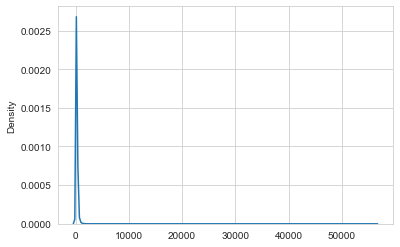

In [6]:
# Import the libraries
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
# matplotlib histogram
is_numeric_dtype(ber['BerRating'])
sns.set_style('whitegrid')
#density plot
sns.kdeplot(np.array(ber['BerRating']), bw=0.5)



Boxplot and density plot not appearing as expected due to outliers.

C:\Users\jetpr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BerRating'>

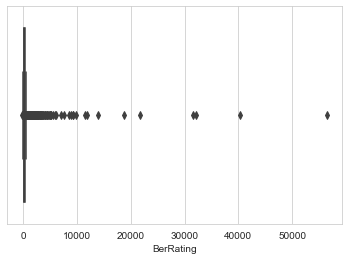

In [7]:
sns.boxplot(ber['BerRating'])


Find outliers three standard deviations from the mean, beyond the 99.7% or 0.3% of expected values.

In [8]:
print("Highest allowed",ber['BerRating'].mean() + 3*ber['BerRating'].std())
print("Lowest allowed",ber['BerRating'].mean() - 3*ber['BerRating'].std())

Highest allowed 769.7982060534331
Lowest allowed -295.88333674824037


Outliers detected 12161. All G rated buildings

Isolate outliers

In [9]:
berOutliers = ber[ (ber['BerRating'] > (ber['BerRating'].mean() + 3*ber['BerRating'].std() )) |
    (ber['BerRating'] < (ber['BerRating'].mean() - 3*ber['BerRating'].std() )) ]

In [10]:
berOutliers.groupby(['EnergyRating']).count()


,index,CountyName,DwellingTypeDescr,Year_of_Construction,TypeofRating,BerRating,GroundFloorArea(sq m),UValueWall,UValueRoof,UValueFloor,...,PurposeOfRating,DateOfAssessment,FirstWallDescription,FirstWallArea,FirstWallUValue,FirstWallIsSemiExposed,FirstWallAgeBandId,FirstWallTypeId,SecondWallIsSemiExposed,SA_Code
EnergyRating,,,,,,,,,,,,,,,,,,,,,
G,12161,12161,12161,12161,12161,12161,12161,12161,12161,12161,...,12161,12161,7530,12158,12158,12158,12155,12158,7114,7121


Isolate normalised dataset, without outliers.

In [11]:
berNormal = ber[ (ber['BerRating'] <= (ber['BerRating'].mean() + 3*ber['BerRating'].std() )) &
    (ber['BerRating'] >= (ber['BerRating'].mean() - 3*ber['BerRating'].std() )) ]

Recheck normalised BER dataset.

C:\Users\jetpr\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

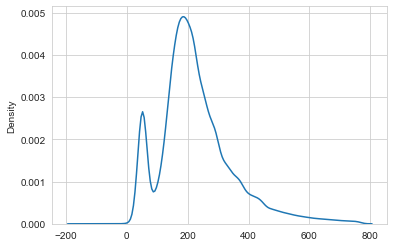

In [12]:
sns.kdeplot(np.array(berNormal['BerRating']), 
#log_scale=True,
bw=0.1)


Possible bi-modal data

C:\Users\jetpr\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

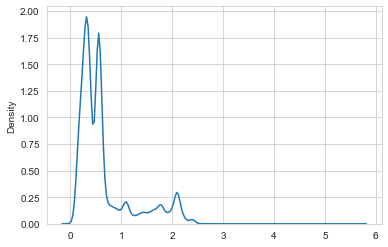

In [13]:
sns.kdeplot(np.array(berNormal['UValueWall']),
#log_scale=True, 
bw=0.1)



C:\Users\jetpr\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

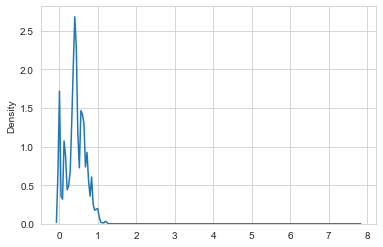

In [18]:
sns.kdeplot(np.array(berNormal['UValueFloor']), 
bw=0.1)


C:\Users\jetpr\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

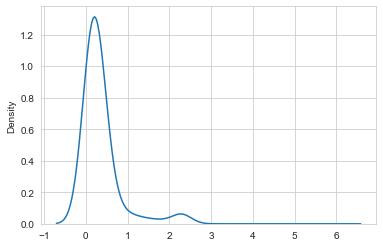

In [19]:
sns.kdeplot(np.array(berNormal['UValueRoof']), bw=0.5)

C:\Users\jetpr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BerRating'>

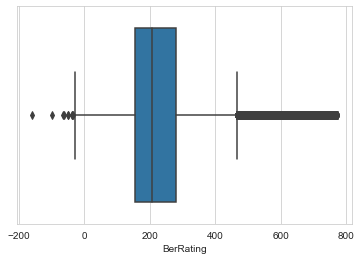

In [14]:
sns.boxplot(berNormal['BerRating'])


Build Predictive Model

In [15]:
import math
#is_string_dtype(berNormal['BerRating'])
is_string_dtype(berNormal['UValueWall'])

False

Check variables types

In [22]:
berNormal.dtypes

index                                int64
CountyName                          object
DwellingTypeDescr                   object
Year_of_Construction                 int64
TypeofRating                        object
EnergyRating                        object
BerRating                          float64
GroundFloorArea(sq m)              float64
UValueWall                         float64
UValueRoof                         float64
UValueFloor                        float64
UValueWindow                       float64
UvalueDoor                         float64
WallArea                           float64
RoofArea                           float64
FloorArea                          float64
WindowArea                         float64
DoorArea                           float64
NoStoreys                            int64
CO2Rating                          float64
MainSpaceHeatingFuel                object
MainWaterHeatingFuel                object
HSMainSystemEfficiency             float64
MultiDwelli

Scatterplot of BER rating and U-Value wall

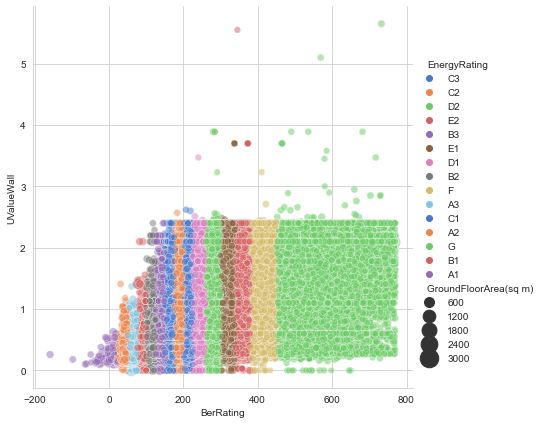

In [16]:



sns.relplot(x = "BerRating", y= "UValueWall", 
hue="EnergyRating", 
size="GroundFloorArea(sq m)",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, 
          
            data= berNormal )



Scatterplot of BER rating and U-Value Window

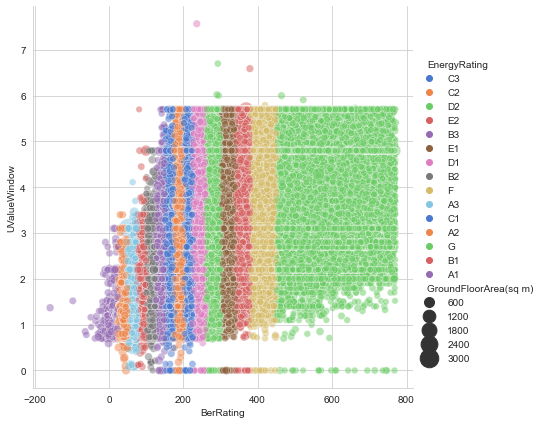

In [24]:

sns.relplot(x = "BerRating", y= "UValueWindow", 
hue="EnergyRating", 
size="GroundFloorArea(sq m)",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, 
        
            data= berNormal )


sns.relplot(x = "BerRating", y= "UValueWindow", 
hue="EnergyRating", 
size="GroundFloorArea(sq m)",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, 
            #ax = ax, 
            data= berNormal )


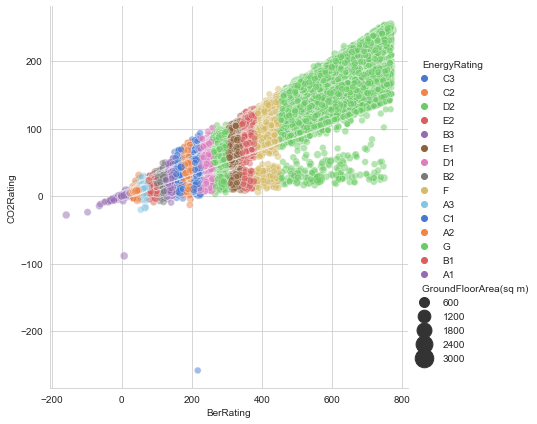

In [34]:
sns.relplot(x = "BerRating", y= "CO2Rating", 
hue="EnergyRating", 
size="GroundFloorArea(sq m)",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, 
        
            data= berNormal )

Future search for outliers

In [25]:
#clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

In [26]:
#X = berNormal[['BerRating', 'UValueWindow']]
#'GroundFloorArea(sq m)']]
#y_pred = clf.fit_predict(X)

In [27]:
#X_scores = clf.negative_outlier_factor_

convert from numpy to pandas to remove -1 

In [28]:
#y_pred = pd.DataFrame(y_pred)
#y_pred.groupby([0]).count()
#y_pred.value_counts(y_pred[0], sort=True, ascending=False)

0
 1    899454
-1     99940
dtype: int64

In [ ]:
#sns.relplot(x = "BerRating", y= "UValueWindow",
# hue="DwellingTypeDescr",
#  size="GroundFloorArea(sq m)",
           # sizes=(40, 400), alpha=.5, palette="muted",
           # height=6, 
            #ax = ax, 
           # data= X )

#plt.scatter(X.iloc[:, 0].values, X.iloc[:, 1].values, color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
#radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
#plt.scatter(    X.iloc[:, 0].values,   X.iloc[:, 1].values,
#    s=1000 * radius,
#    edgecolors="r",
#    facecolors="none",
#    label="Outlier scores",
#)

Savepoint

In [17]:
#999394 rows, 113 columns
berNormal.to_pickle('project/berNormal.pkl')
berNormal = pd.read_pickle("project/berNormal.pkl")

https://www.askpython.com/python/examples/python-predict-function
Small Area

In [18]:
berNormal.dtypes

index                                int64
CountyName                          object
DwellingTypeDescr                   object
Year_of_Construction                 int64
TypeofRating                        object
EnergyRating                        object
BerRating                          float64
GroundFloorArea(sq m)              float64
UValueWall                         float64
UValueRoof                         float64
UValueFloor                        float64
UValueWindow                       float64
UvalueDoor                         float64
WallArea                           float64
RoofArea                           float64
FloorArea                          float64
WindowArea                         float64
DoorArea                           float64
NoStoreys                            int64
CO2Rating                          float64
MainSpaceHeatingFuel                object
MainWaterHeatingFuel                object
HSMainSystemEfficiency             float64
MultiDwelli

In [22]:
# 80 numerical variables 
cols = berNormal.select_dtypes(include=[np.float64,np.int64 ]).columns
berNormal_num =  berNormal[cols].astype(np.float64,np.int64)


In [23]:
berNormal_num.dtypes
#values get changed from int64 to float64

index                              float64
Year_of_Construction               float64
BerRating                          float64
GroundFloorArea(sq m)              float64
UValueWall                         float64
UValueRoof                         float64
UValueFloor                        float64
UValueWindow                       float64
UvalueDoor                         float64
WallArea                           float64
RoofArea                           float64
FloorArea                          float64
WindowArea                         float64
DoorArea                           float64
NoStoreys                          float64
CO2Rating                          float64
HSMainSystemEfficiency             float64
TGDLEdition                        float64
MPCDERValue                        float64
HSEffAdjFactor                     float64
HSSupplHeatFraction                float64
HSSupplSystemEff                   float64
WHMainSystemEff                    float64
WHEffAdjFac

https://realpython.com/linear-regression-in-python/

In [20]:
# 33 catergorical variables
cols_cat = berNormal.select_dtypes(include=[object ]).columns
cols_cat
berNormal_cat =  berNormal[cols_cat].astype(object)


Check variables content

In [52]:
#berNormal_cat.groupby(['CountyName'])['CountyName'].count()
#berNormal_cat.groupby(['DwellingTypeDescr'])['DwellingTypeDescr'].count()
#berNormal_cat.groupby(['TypeofRating'])['TypeofRating'].count()
#berNormal_cat.groupby(['MainSpaceHeatingFuel'])['MainSpaceHeatingFuel'].count()
#berNormal_cat.groupby(['MainWaterHeatingFuel'])['MainWaterHeatingFuel'].count()
#berNormal_cat.groupby(['MultiDwellingMPRN'])['MultiDwellingMPRN'].count()
#berNormal_cat.groupby(['DraftLobby'])['DraftLobby'].count()
#berNormal_cat.groupby(['VentilationMethod'])['VentilationMethod'].count()
#berNormal_cat.groupby(['StructureType'])['StructureType'].count() #please select
#berNormal_cat.groupby(['PermeabilityTest'])['PermeabilityTest'].count()
#berNormal_cat.groupby(['CHBoilerThermostatControlled'])['CHBoilerThermostatControlled'].count()
#berNormal_cat.groupby(['OBBoilerThermostatControlled'])['OBBoilerThermostatControlled'].count()
#berNormal_cat.groupby(['OBPumpInsideDwelling'])['OBPumpInsideDwelling'].count()
#berNormal_cat.groupby(['WarmAirHeatingSystem'])['WarmAirHeatingSystem'].count()
#berNormal_cat.groupby(['UndergroundHeating'])['UndergroundHeating'].count()
#berNormal_cat.groupby(['StorageLosses'])['StorageLosses'].count()
#berNormal_cat.groupby(['ManuLossFactorAvail'])['ManuLossFactorAvail'].count()
#berNormal_cat.groupby(['SolarHotWaterHeating'])['SolarHotWaterHeating'].count()
#berNormal_cat.groupby(['ElecImmersionInSummer'])['ElecImmersionInSummer'].count()
#berNormal_cat.groupby(['CombiBoiler'])['CombiBoiler'].count()
#berNormal_cat.groupby(['KeepHotFacility'])['KeepHotFacility'].count()
#berNormal_cat.groupby(['InsulationType'])['InsulationType'].count()
#berNormal_cat.groupby(['PrimaryCircuitLoss'])['PrimaryCircuitLoss'].count()
#berNormal_cat.groupby(['ThermalMassCategory'])['ThermalMassCategory'].count()
#berNormal_cat.groupby(['PurposeOfRating'])['PurposeOfRating'].count()
#berNormal_cat.groupby(['FirstWallDescription'])['FirstWallDescription'].count()
#berNormal_cat.groupby(['FirstWallIsSemiExposed'])['FirstWallIsSemiExposed'].count()
#berNormal_cat.groupby(['SecondWallIsSemiExposed'])['SecondWallIsSemiExposed'].count()


SecondWallIsSemiExposed
No     363976
Yes    116615
Name: SecondWallIsSemiExposed, dtype: int64

Catergorical Variables

In [24]:
# remove some cat variables with poor data, 10 variables left
berNormal_cat_x = berNormal_cat.drop(['EnergyRating', 'PermeabilityTest', 'DateOfAssessment', 'CountyName', 
'TypeofRating', 'MainSpaceHeatingFuel', 'MainWaterHeatingFuel', 'MultiDwellingMPRN',
'VentilationMethod', 'StructureType', 'OBBoilerThermostatControlled','KeepHotFacility', 
'OBPumpInsideDwelling', 'WarmAirHeatingSystem', 'UndergroundHeating', 'StorageLosses',
'ManuLossFactorAvail', 'SolarHotWaterHeating', 'CombiBoiler', 'KeepHotFacility',
'PurposeOfRating', 'FirstWallDescription', 'FirstWallIsSemiExposed', 'SecondWallIsSemiExposed'], axis = 1)


In [55]:
# one hot encode
ber_cat = pd.get_dummies(berNormal_cat_x)


catergorical checkpoint

In [ ]:
ber_cat.to_pickle('project/ber_cat.pkl')
#berNormal = pd.read_pickle("project/berNormal.pkl")

Linear Regression

In [25]:
# U
X = pd.DataFrame(berNormal_num['BerRating'])
#y = pd.DataFrame(berNormal_num['UValueWall']) #45%
y = pd.DataFrame(berNormal_num['UValueWindow'])


In [26]:
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
 model.fit(X.iloc[train,:], y.iloc[train,:])
 score = model.score(X.iloc[test,:], y.iloc[test,:])
 scores.append(score)
print(scores)

[0.396449166448434, 0.39668767051763865, 0.3982482923922521]


In [27]:
# Drop Nas, from 999,394 to 607,960 rows
ber_clean = berNormal_num.dropna()



In [28]:
ber_clean.to_pickle('project/ber_clean.pkl')
ber_clean= pd.read_pickle("project/ber_clean.pkl")

Check correlation

In [24]:
corr_plot = round(ber_clean.corr(),2)

In [26]:
%pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [27]:
%pwd

'd:\\Colleges\\DCU\\A.I\\Data Analysis'

Write to excel for further analysis

In [28]:
corr_plot.to_excel(r'corrplot.xlsx', index = False)


Fid and remove variables relating to CO2

In [33]:
ber_clean.columns
CO2_cols = [col for col in ber_clean.columns if 'CO2' in col]
print(CO2_cols)

['CO2Rating', 'CO2Lighting', 'CO2PumpsFans', 'CO2MainWater', 'CO2MainSpace', 'CO2SecondarySpace']


In [37]:
#high correlation
#FirstWallArea - GroundFloorArea
#FirstWallUValue - UValueWall
#78 variables
ber_clean = ber_clean.drop(['CO2Rating', 'MPCDERValue'], axis = 1)
#73 variables
ber_clean = ber_clean.drop([ 'CO2Lighting', 'CO2PumpsFans', 'CO2MainWater', 'CO2MainSpace', 'CO2SecondarySpace'], axis = 1)

Find and remove columns relating to area

In [38]:
Area_cols = [col for col in ber_clean.columns if 'Area' in col]
print(Area_cols)

['GroundFloorArea(sq m)', 'WallArea', 'RoofArea', 'FloorArea', 'WindowArea', 'DoorArea', 'GroundFloorArea', 'FirstFloorArea', 'PredominantRoofTypeArea', 'LivingAreaPercent', 'RoomInRoofArea', 'FirstWallArea']


In [10]:
x = ber_clean.drop('BerRating',axis=1)
y = ber_clean['BerRating']

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [ ]:
#remove NaN

In [12]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [16]:
y_prediction =  LR.predict(x_test)
y_prediction

array([156.25851, 120.8034 , 308.834  , ..., 176.42715, 544.2506 ,
       487.43216], dtype=float32)

In [17]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==', np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.9849650773473413
mean_sqrd_error is== 193.18626
root_mean_squared error of is== 13.899146


In [18]:
import statsmodels.api as sm

ks = sm.OLS(y, x)
ks_res =ks.fit()
ks_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              BerRating   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          6.339e+06
Date:                Tue, 08 Mar 2022   Prob (F-statistic):                        0.00
Time:                        20:51:10   Log-Likelihood:                     -2.4410e+06
No. Observations:              607960   AIC:                                  4.882e+06
Df Residuals:                  607920   BIC:                                  4.883e+06
Df Model:                          40                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
index                            6.648e-07   6.01e-08     11.060      0.000    5.47e-07    7.83e-07
Year_of_Construction                0.0263      0.000     54.155      0.000       0.025       0.027
GroundFloorArea(sq m)              -0.1377      0.002    -56.467      0.000      -0.142      -0.133
UValueWall                         15.6657      0.132    119.119      0.000      15.408      15.923
UValueRoof                         10.9237      0.058    189.744      0.000      10.811      11.036
UValueFloor                        11.7644      0.138     85.104      0.000      11.493      12.035
UValueWindow                        2.8793      0.030     97.360      0.000       2.821       2.937
UvalueDoor                          0.0066      0.021      0.314      0.754      -0.035       0.048
WallArea                            0.0540      0.001     57.598      0.000       0.052       0.056
RoofArea                            0.0645      0.001     52.311      0.000       0.062       0.067
FloorArea                           0.0109      0.001      8.325      0.000       0.008       0.014
WindowArea                         -0.0551      0.002    -26.042      0.000      -0.059      -0.051
DoorArea                            0.2486      0.009     27.657      0.000       0.231       0.266
NoStoreys                          -4.6516      0.075    -62.142      0.000      -4.798      -4.505
CO2Rating                           3.2157      0.003   1255.722      0.000       3.211       3.221
HSMainSystemEfficiency              0.0048      0.001      6.970      0.000       0.003       0.006
TGDLEdition                         0.0318      0.061      0.523      0.601      -0.087       0.151
MPCDERValue                         0.1763      0.004     46.924      0.000       0.169       0.184
HSEffAdjFactor                    -28.1630      1.010    -27.870      0.000     -30.144     -26.182
HSSupplHeatFraction                65.4811      0.934     70.102      0.000      63.650      67.312
HSSupplSystemEff                   -0.0494      0.001    -47.752      0.000      -0.051      -0.047
WHMainSystemEff                    -0.0546      0.001    -39.304      0.000      -0.057      -0.052
WHEffAdjFactor                    -15.9631      0.866    -18.430      0.000     -17.661     -14.266
SupplSHFuel                      9.393e-05      0.000      0.899      0.369      -0.000       0.000
SupplWHFuel                        -0.0228      0.002    -10.671      0.000      -0.027      -0.019
SHRenewableResources               -0.8700      0.348     -2.502      0.012      -1.552      -0.188
WHRenewableResources                3.6734      0.343     10.703      0.000       3.